In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
spark

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/06/02 00:41:01 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
titanic_sdf = spark.read.csv('data/titanic_train.csv', header=True, inferSchema=True)
titanic_pdf = titanic_sdf.toPandas()
titanic_sdf.limit(10).show(truncate=False)

+-----------+--------+------+---------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|Name                                               |Sex   |Age |SibSp|Parch|Ticket          |Fare   |Cabin|Embarked|
+-----------+--------+------+---------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+
|1          |0       |3     |Braund, Mr. Owen Harris                            |male  |22.0|1    |0    |A/5 21171       |7.25   |null |S       |
|2          |1       |1     |Cumings, Mrs. John Bradley (Florence Briggs Thayer)|female|38.0|1    |0    |PC 17599        |71.2833|C85  |C       |
|3          |1       |3     |Heikkinen, Miss. Laina                             |female|26.0|0    |0    |STON/O2. 3101282|7.925  |null |S       |
|4          |1       |1     |Futrelle, Mrs. Jacques Heath (Lily May Peel)       |female|35.0|1    |0    |113803          |53

In [4]:
titanic_sdf.createOrReplaceTempView('titanic_view')

In [9]:
spark.sql('select * from titanic_view').show(truncate=False)

+-----------+--------+------+-------------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|Name                                                   |Sex   |Age |SibSp|Parch|Ticket          |Fare   |Cabin|Embarked|
+-----------+--------+------+-------------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+
|1          |0       |3     |Braund, Mr. Owen Harris                                |male  |22.0|1    |0    |A/5 21171       |7.25   |null |S       |
|2          |1       |1     |Cumings, Mrs. John Bradley (Florence Briggs Thayer)    |female|38.0|1    |0    |PC 17599        |71.2833|C85  |C       |
|3          |1       |3     |Heikkinen, Miss. Laina                                 |female|26.0|0    |0    |STON/O2. 3101282|7.925  |null |S       |
|4          |1       |1     |Futrelle, Mrs. Jacques Heath (Lily May Peel)           |female|35.0|1  

In [11]:
titanic_sdf.select('*').show(truncate=False)

+-----------+--------+------+-------------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|Name                                                   |Sex   |Age |SibSp|Parch|Ticket          |Fare   |Cabin|Embarked|
+-----------+--------+------+-------------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+
|1          |0       |3     |Braund, Mr. Owen Harris                                |male  |22.0|1    |0    |A/5 21171       |7.25   |null |S       |
|2          |1       |1     |Cumings, Mrs. John Bradley (Florence Briggs Thayer)    |female|38.0|1    |0    |PC 17599        |71.2833|C85  |C       |
|3          |1       |3     |Heikkinen, Miss. Laina                                 |female|26.0|0    |0    |STON/O2. 3101282|7.925  |null |S       |
|4          |1       |1     |Futrelle, Mrs. Jacques Heath (Lily May Peel)           |female|35.0|1  

In [13]:
spark.sql('select * from titanic_view limit 10').show(truncate=False)

+-----------+--------+------+---------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|Name                                               |Sex   |Age |SibSp|Parch|Ticket          |Fare   |Cabin|Embarked|
+-----------+--------+------+---------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+
|1          |0       |3     |Braund, Mr. Owen Harris                            |male  |22.0|1    |0    |A/5 21171       |7.25   |null |S       |
|2          |1       |1     |Cumings, Mrs. John Bradley (Florence Briggs Thayer)|female|38.0|1    |0    |PC 17599        |71.2833|C85  |C       |
|3          |1       |3     |Heikkinen, Miss. Laina                             |female|26.0|0    |0    |STON/O2. 3101282|7.925  |null |S       |
|4          |1       |1     |Futrelle, Mrs. Jacques Heath (Lily May Peel)       |female|35.0|1    |0    |113803          |53

In [15]:
titanic_sdf.limit(10).show(truncate=False)
titanic_sdf.select('*').limit(10).show(truncate=False)

+-----------+--------+------+---------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|Name                                               |Sex   |Age |SibSp|Parch|Ticket          |Fare   |Cabin|Embarked|
+-----------+--------+------+---------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+
|1          |0       |3     |Braund, Mr. Owen Harris                            |male  |22.0|1    |0    |A/5 21171       |7.25   |null |S       |
|2          |1       |1     |Cumings, Mrs. John Bradley (Florence Briggs Thayer)|female|38.0|1    |0    |PC 17599        |71.2833|C85  |C       |
|3          |1       |3     |Heikkinen, Miss. Laina                             |female|26.0|0    |0    |STON/O2. 3101282|7.925  |null |S       |
|4          |1       |1     |Futrelle, Mrs. Jacques Heath (Lily May Peel)       |female|35.0|1    |0    |113803          |53

In [17]:
spark.sql('select t.*, upper(name) as cap_name from titanic_view t').show(truncate=False)

+-----------+--------+------+-------------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+-------------------------------------------------------+
|PassengerId|Survived|Pclass|Name                                                   |Sex   |Age |SibSp|Parch|Ticket          |Fare   |Cabin|Embarked|cap_name                                               |
+-----------+--------+------+-------------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+-------------------------------------------------------+
|1          |0       |3     |Braund, Mr. Owen Harris                                |male  |22.0|1    |0    |A/5 21171       |7.25   |null |S       |BRAUND, MR. OWEN HARRIS                                |
|2          |1       |1     |Cumings, Mrs. John Bradley (Florence Briggs Thayer)    |female|38.0|1    |0    |PC 17599        |71.2833|C85  |C       |CUMINGS, MRS. JOHN BRADLEY 

In [20]:
import pyspark.sql.functions as F
titanic_sdf.select('*', F.upper(F.col('name')).alias('cap_name')).show(truncate=False)

+-----------+--------+------+-------------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+-------------------------------------------------------+
|PassengerId|Survived|Pclass|Name                                                   |Sex   |Age |SibSp|Parch|Ticket          |Fare   |Cabin|Embarked|cap_name                                               |
+-----------+--------+------+-------------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+-------------------------------------------------------+
|1          |0       |3     |Braund, Mr. Owen Harris                                |male  |22.0|1    |0    |A/5 21171       |7.25   |null |S       |BRAUND, MR. OWEN HARRIS                                |
|2          |1       |1     |Cumings, Mrs. John Bradley (Florence Briggs Thayer)    |female|38.0|1    |0    |PC 17599        |71.2833|C85  |C       |CUMINGS, MRS. JOHN BRADLEY 

In [22]:
spark.sql('select t.*, substring(cabin, 0, 1) as cap_cabin from titanic_view t').show(truncate=False)

+-----------+--------+------+-------------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+---------+
|PassengerId|Survived|Pclass|Name                                                   |Sex   |Age |SibSp|Parch|Ticket          |Fare   |Cabin|Embarked|cap_cabin|
+-----------+--------+------+-------------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+---------+
|1          |0       |3     |Braund, Mr. Owen Harris                                |male  |22.0|1    |0    |A/5 21171       |7.25   |null |S       |null     |
|2          |1       |1     |Cumings, Mrs. John Bradley (Florence Briggs Thayer)    |female|38.0|1    |0    |PC 17599        |71.2833|C85  |C       |C        |
|3          |1       |3     |Heikkinen, Miss. Laina                                 |female|26.0|0    |0    |STON/O2. 3101282|7.925  |null |S       |null     |
|4          |1       |1     |Futrelle, M

In [25]:
# titanic_sdf.select('*', F.substring(F.col('cabin'), 0, 1).alias('cab_cabin')).show(truncate=False)
titanic_sdf.withColumn('cab_cabin', F.substring('cabin', 0, 1)).show(truncate=False)

+-----------+--------+------+-------------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+---------+
|PassengerId|Survived|Pclass|Name                                                   |Sex   |Age |SibSp|Parch|Ticket          |Fare   |Cabin|Embarked|cab_cabin|
+-----------+--------+------+-------------------------------------------------------+------+----+-----+-----+----------------+-------+-----+--------+---------+
|1          |0       |3     |Braund, Mr. Owen Harris                                |male  |22.0|1    |0    |A/5 21171       |7.25   |null |S       |null     |
|2          |1       |1     |Cumings, Mrs. John Bradley (Florence Briggs Thayer)    |female|38.0|1    |0    |PC 17599        |71.2833|C85  |C       |C        |
|3          |1       |3     |Heikkinen, Miss. Laina                                 |female|26.0|0    |0    |STON/O2. 3101282|7.925  |null |S       |null     |
|4          |1       |1     |Futrelle, M

In [26]:
spark.sql('select * from titanic_view where Pclass = 1 and Age > 60').show(truncate=False)

+-----------+--------+------+-----------------------------------------+------+----+-----+-----+---------+-------+-----------+--------+
|PassengerId|Survived|Pclass|Name                                     |Sex   |Age |SibSp|Parch|Ticket   |Fare   |Cabin      |Embarked|
+-----------+--------+------+-----------------------------------------+------+----+-----+-----+---------+-------+-----------+--------+
|55         |0       |1     |Ostby, Mr. Engelhart Cornelius           |male  |65.0|0    |1    |113509   |61.9792|B30        |C       |
|97         |0       |1     |Goldschmidt, Mr. George B                |male  |71.0|0    |0    |PC 17754 |34.6542|A5         |C       |
|171        |0       |1     |Van der hoef, Mr. Wyckoff                |male  |61.0|0    |0    |111240   |33.5   |B19        |S       |
|253        |0       |1     |Stead, Mr. William Thomas                |male  |62.0|0    |0    |113514   |26.55  |C87        |S       |
|276        |1       |1     |Andrews, Miss. Kornelia Th

In [29]:
titanic_sdf.filter((F.col('Pclass') == 1) & (F.col('Age') > 60)).show(truncate=False)

+-----------+--------+------+-----------------------------------------+------+----+-----+-----+---------+-------+-----------+--------+
|PassengerId|Survived|Pclass|Name                                     |Sex   |Age |SibSp|Parch|Ticket   |Fare   |Cabin      |Embarked|
+-----------+--------+------+-----------------------------------------+------+----+-----+-----+---------+-------+-----------+--------+
|55         |0       |1     |Ostby, Mr. Engelhart Cornelius           |male  |65.0|0    |1    |113509   |61.9792|B30        |C       |
|97         |0       |1     |Goldschmidt, Mr. George B                |male  |71.0|0    |0    |PC 17754 |34.6542|A5         |C       |
|171        |0       |1     |Van der hoef, Mr. Wyckoff                |male  |61.0|0    |0    |111240   |33.5   |B19        |S       |
|253        |0       |1     |Stead, Mr. William Thomas                |male  |62.0|0    |0    |113514   |26.55  |C87        |S       |
|276        |1       |1     |Andrews, Miss. Kornelia Th

In [31]:
spark.sql('select pclass, name, age from titanic_view where upper(name) like "%MR.%"').show(truncate=False)

+------+------------------------------+----+
|pclass|name                          |age |
+------+------------------------------+----+
|3     |Braund, Mr. Owen Harris       |22.0|
|3     |Allen, Mr. William Henry      |35.0|
|3     |Moran, Mr. James              |null|
|1     |McCarthy, Mr. Timothy J       |54.0|
|3     |Saundercock, Mr. William Henry|20.0|
|3     |Andersson, Mr. Anders Johan   |39.0|
|2     |Williams, Mr. Charles Eugene  |null|
|2     |Fynney, Mr. Joseph J          |35.0|
|2     |Beesley, Mr. Lawrence         |34.0|
|1     |Sloper, Mr. William Thompson  |28.0|
|3     |Emir, Mr. Farred Chehab       |null|
|1     |Fortune, Mr. Charles Alexander|19.0|
|3     |Todoroff, Mr. Lalio           |null|
|2     |Wheadon, Mr. Edward H         |66.0|
|1     |Meyer, Mr. Edgar Joseph       |28.0|
|1     |Holverson, Mr. Alexander Oskar|42.0|
|3     |Mamee, Mr. Hanna              |null|
|3     |Cann, Mr. Ernest Charles      |21.0|
|3     |Kraeff, Mr. Theodor           |null|
|3     |Ro

In [119]:
titanic_sdf.select('pclass', 'name', 'age').filter(F.upper(F.col('name')).like('%MR.%')).show(truncate=False)

+------+------------------------------+----+
|pclass|name                          |age |
+------+------------------------------+----+
|3     |Braund, Mr. Owen Harris       |22.0|
|3     |Allen, Mr. William Henry      |35.0|
|3     |Moran, Mr. James              |null|
|1     |McCarthy, Mr. Timothy J       |54.0|
|3     |Saundercock, Mr. William Henry|20.0|
|3     |Andersson, Mr. Anders Johan   |39.0|
|2     |Williams, Mr. Charles Eugene  |null|
|2     |Fynney, Mr. Joseph J          |35.0|
|2     |Beesley, Mr. Lawrence         |34.0|
|1     |Sloper, Mr. William Thompson  |28.0|
|3     |Emir, Mr. Farred Chehab       |null|
|1     |Fortune, Mr. Charles Alexander|19.0|
|3     |Todoroff, Mr. Lalio           |null|
|2     |Wheadon, Mr. Edward H         |66.0|
|1     |Meyer, Mr. Edgar Joseph       |28.0|
|1     |Holverson, Mr. Alexander Oskar|42.0|
|3     |Mamee, Mr. Hanna              |null|
|3     |Cann, Mr. Ernest Charles      |21.0|
|3     |Kraeff, Mr. Theodor           |null|
|3     |Ro

In [32]:
spark.sql('select * from titanic_view where pclass in (1, 2)').show()

+-----------+--------+------+--------------------+------+----+-----+-----+-------------+--------+-----------+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|       Ticket|    Fare|      Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+-------------+--------+-----------+--------+
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|     PC 17599| 71.2833|        C85|       C|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|       113803|    53.1|       C123|       S|
|          7|       0|     1|McCarthy, Mr. Tim...|  male|54.0|    0|    0|        17463| 51.8625|        E46|       S|
|         10|       1|     2|Nasser, Mrs. Nich...|female|14.0|    1|    0|       237736| 30.0708|       null|       C|
|         12|       1|     1|Bonnell, Miss. El...|female|58.0|    0|    0|       113783|   26.55|       C103|       S|
|         16|       1|     2|Hewlett, Mrs. (Ma..

In [121]:
titanic_sdf.filter(F.col('pclass').isin(1, 2)).show()

+-----------+--------+------+--------------------+------+----+-----+-----+-------------+--------+-----------+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|       Ticket|    Fare|      Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+-------------+--------+-----------+--------+
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|     PC 17599| 71.2833|        C85|       C|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|       113803|    53.1|       C123|       S|
|          7|       0|     1|McCarthy, Mr. Tim...|  male|54.0|    0|    0|        17463| 51.8625|        E46|       S|
|         10|       1|     2|Nasser, Mrs. Nich...|female|14.0|    1|    0|       237736| 30.0708|       null|       C|
|         12|       1|     1|Bonnell, Miss. El...|female|58.0|    0|    0|       113783|   26.55|       C103|       S|
|         16|       1|     2|Hewlett, Mrs. (Ma..

In [34]:
spark.sql('select * from titanic_view t order by pclass asc limit 10').show()

+-----------+--------+------+--------------------+------+----+-----+-----+--------+--------+-----------+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|  Ticket|    Fare|      Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+--------+--------+-----------+--------+
|         35|       0|     1|Meyer, Mr. Edgar ...|  male|28.0|    1|    0|PC 17604| 82.1708|       null|       C|
|         89|       1|     1|Fortune, Miss. Ma...|female|23.0|    3|    2|   19950|   263.0|C23 C25 C27|       S|
|         36|       0|     1|Holverson, Mr. Al...|  male|42.0|    1|    0|  113789|    52.0|       null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|PC 17599| 71.2833|        C85|       C|
|         53|       1|     1|Harper, Mrs. Henr...|female|49.0|    1|    0|PC 17572| 76.7292|        D33|       C|
|          7|       0|     1|McCarthy, Mr. Tim...|  male|54.0|    0|    0|   17463| 51.8

In [37]:
# titanic_sdf.select('*').orderBy('pclass').limit(10).show()
titanic_sdf.orderBy('pclass').limit(10).show()

+-----------+--------+------+--------------------+------+----+-----+-----+--------+--------+-----------+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|  Ticket|    Fare|      Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+--------+--------+-----------+--------+
|         35|       0|     1|Meyer, Mr. Edgar ...|  male|28.0|    1|    0|PC 17604| 82.1708|       null|       C|
|         89|       1|     1|Fortune, Miss. Ma...|female|23.0|    3|    2|   19950|   263.0|C23 C25 C27|       S|
|         36|       0|     1|Holverson, Mr. Al...|  male|42.0|    1|    0|  113789|    52.0|       null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|PC 17599| 71.2833|        C85|       C|
|         53|       1|     1|Harper, Mrs. Henr...|female|49.0|    1|    0|PC 17572| 76.7292|        D33|       C|
|          7|       0|     1|McCarthy, Mr. Tim...|  male|54.0|    0|    0|   17463| 51.8

In [123]:
spark.sql('select * from titanic_view t order by pclass, name desc').show(truncate=False)

+-----------+--------+------+----------------------------------------------------+------+----+-----+-----+--------+--------+-----+--------+
|PassengerId|Survived|Pclass|Name                                                |Sex   |Age |SibSp|Parch|Ticket  |Fare    |Cabin|Embarked|
+-----------+--------+------+----------------------------------------------------+------+----+-----+-----+--------+--------+-----+--------+
|326        |1       |1     |Young, Miss. Marie Grice                            |female|36.0|0    |0    |PC 17760|135.6333|C32  |C       |
|556        |0       |1     |Wright, Mr. George                                  |male  |62.0|0    |0    |113807  |26.55   |null |S       |
|56         |1       |1     |Woolner, Mr. Hugh                                   |male  |null|0    |0    |19947   |35.5    |C52  |S       |
|352        |0       |1     |Williams-Lambert, Mr. Fletcher Fellows              |male  |null|0    |0    |113510  |35.0    |C128 |S       |
|156        |0      

In [122]:
titanic_sdf.orderBy(['pclass', 'name'], ascending=[True, False]).show(truncate=False)

+-----------+--------+------+----------------------------------------------------+------+----+-----+-----+--------+--------+-----+--------+
|PassengerId|Survived|Pclass|Name                                                |Sex   |Age |SibSp|Parch|Ticket  |Fare    |Cabin|Embarked|
+-----------+--------+------+----------------------------------------------------+------+----+-----+-----+--------+--------+-----+--------+
|326        |1       |1     |Young, Miss. Marie Grice                            |female|36.0|0    |0    |PC 17760|135.6333|C32  |C       |
|556        |0       |1     |Wright, Mr. George                                  |male  |62.0|0    |0    |113807  |26.55   |null |S       |
|56         |1       |1     |Woolner, Mr. Hugh                                   |male  |null|0    |0    |19947   |35.5    |C52  |S       |
|352        |0       |1     |Williams-Lambert, Mr. Fletcher Fellows              |male  |null|0    |0    |113510  |35.0    |C128 |S       |
|156        |0      

In [40]:
spark.sql('select count(*) as cnt from titanic_view').show()

+---+
|cnt|
+---+
|891|
+---+



In [42]:
titanic_sdf.count()

891

In [43]:
spark.sql('select max(age), min(age), avg(sibsp) from titanic_view').show()

+--------+--------+------------------+
|max(age)|min(age)|        avg(sibsp)|
+--------+--------+------------------+
|    80.0|    0.42|0.5230078563411896|
+--------+--------+------------------+



In [124]:
titanic_sdf.select(F.max('age'), F.min('age'), F.avg('sibsp')).show()
# titanic_sdf.agg(F.max('age'), F.min('age'), F.avg('sibsp')).show()

+--------+--------+------------------+
|max(age)|min(age)|        avg(sibsp)|
+--------+--------+------------------+
|    80.0|    0.42|0.5230078563411896|
+--------+--------+------------------+



In [49]:
spark.sql('select pclass, max(age), min(age), avg(sibsp) from titanic_view t group by pclass having max(age) > 70 order by pclass ').show()

+------+--------+--------+------------------+
|pclass|max(age)|min(age)|        avg(sibsp)|
+------+--------+--------+------------------+
|     1|    80.0|    0.92|0.4166666666666667|
|     3|    74.0|    0.42| 0.615071283095723|
+------+--------+--------+------------------+



In [53]:
titanic_sdf.groupBy('pclass')   \
            .agg(F.max(F.col('age')), F.min(F.col('age')), F.avg(F.col('sibsp')))   \
            .filter(F.max(F.col('age')) > 70)  \
            .orderBy('pclass')  \
            .show()

+------+--------+--------+------------------+
|pclass|max(age)|min(age)|        avg(sibsp)|
+------+--------+--------+------------------+
|     1|    80.0|    0.92|0.4166666666666667|
|     3|    74.0|    0.42| 0.615071283095723|
+------+--------+--------+------------------+



In [56]:
spark.sql('''
    select pclass, max_age, min_age, avg_sibsp from
    (select pclass, max(age) as max_age, min(age) as min_age, avg(sibsp) as avg_sibsp from titanic_view group by pclass)
    where max_age > 70
''').show()

+------+-------+-------+------------------+
|pclass|max_age|min_age|         avg_sibsp|
+------+-------+-------+------------------+
|     1|   80.0|   0.92|0.4166666666666667|
|     3|   74.0|   0.42| 0.615071283095723|
+------+-------+-------+------------------+



In [57]:
# error: cannot update view
spark.sql('update titanic_view set fare = fare*10')

Py4JJavaError: An error occurred while calling o23.sql.
: org.apache.spark.SparkUnsupportedOperationException: UPDATE TABLE is not supported temporarily.
	at org.apache.spark.sql.errors.QueryExecutionErrors$.ddlUnsupportedTemporarilyError(QueryExecutionErrors.scala:1109)
	at org.apache.spark.sql.execution.SparkStrategies$BasicOperators$.apply(SparkStrategies.scala:896)
	at org.apache.spark.sql.catalyst.planning.QueryPlanner.$anonfun$plan$1(QueryPlanner.scala:63)
	at scala.collection.Iterator$$anon$11.nextCur(Iterator.scala:486)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:492)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:491)
	at org.apache.spark.sql.catalyst.planning.QueryPlanner.plan(QueryPlanner.scala:93)
	at org.apache.spark.sql.execution.SparkStrategies.plan(SparkStrategies.scala:70)
	at org.apache.spark.sql.catalyst.planning.QueryPlanner.$anonfun$plan$3(QueryPlanner.scala:78)
	at scala.collection.TraversableOnce$folder$1.apply(TraversableOnce.scala:196)
	at scala.collection.TraversableOnce$folder$1.apply(TraversableOnce.scala:194)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at scala.collection.TraversableOnce.foldLeft(TraversableOnce.scala:199)
	at scala.collection.TraversableOnce.foldLeft$(TraversableOnce.scala:192)
	at scala.collection.AbstractIterator.foldLeft(Iterator.scala:1431)
	at org.apache.spark.sql.catalyst.planning.QueryPlanner.$anonfun$plan$2(QueryPlanner.scala:75)
	at scala.collection.Iterator$$anon$11.nextCur(Iterator.scala:486)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:492)
	at org.apache.spark.sql.catalyst.planning.QueryPlanner.plan(QueryPlanner.scala:93)
	at org.apache.spark.sql.execution.SparkStrategies.plan(SparkStrategies.scala:70)
	at org.apache.spark.sql.execution.QueryExecution$.createSparkPlan(QueryExecution.scala:476)
	at org.apache.spark.sql.execution.QueryExecution.$anonfun$sparkPlan$1(QueryExecution.scala:162)
	at org.apache.spark.sql.catalyst.QueryPlanningTracker.measurePhase(QueryPlanningTracker.scala:111)
	at org.apache.spark.sql.execution.QueryExecution.$anonfun$executePhase$2(QueryExecution.scala:202)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:526)
	at org.apache.spark.sql.execution.QueryExecution.$anonfun$executePhase$1(QueryExecution.scala:202)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:827)
	at org.apache.spark.sql.execution.QueryExecution.executePhase(QueryExecution.scala:201)
	at org.apache.spark.sql.execution.QueryExecution.sparkPlan$lzycompute(QueryExecution.scala:162)
	at org.apache.spark.sql.execution.QueryExecution.sparkPlan(QueryExecution.scala:155)
	at org.apache.spark.sql.execution.QueryExecution.$anonfun$executedPlan$1(QueryExecution.scala:175)
	at org.apache.spark.sql.catalyst.QueryPlanningTracker.measurePhase(QueryPlanningTracker.scala:111)
	at org.apache.spark.sql.execution.QueryExecution.$anonfun$executePhase$2(QueryExecution.scala:202)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:526)
	at org.apache.spark.sql.execution.QueryExecution.$anonfun$executePhase$1(QueryExecution.scala:202)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:827)
	at org.apache.spark.sql.execution.QueryExecution.executePhase(QueryExecution.scala:201)
	at org.apache.spark.sql.execution.QueryExecution.executedPlan$lzycompute(QueryExecution.scala:175)
	at org.apache.spark.sql.execution.QueryExecution.executedPlan(QueryExecution.scala:168)
	at org.apache.spark.sql.execution.QueryExecution.simpleString(QueryExecution.scala:221)
	at org.apache.spark.sql.execution.QueryExecution.org$apache$spark$sql$execution$QueryExecution$$explainString(QueryExecution.scala:266)
	at org.apache.spark.sql.execution.QueryExecution.explainString(QueryExecution.scala:235)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:112)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:195)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:103)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:827)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:65)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:94)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$transformDownWithPruning$1(TreeNode.scala:512)
	at org.apache.spark.sql.catalyst.trees.CurrentOrigin$.withOrigin(TreeNode.scala:104)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDownWithPruning(TreeNode.scala:512)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.org$apache$spark$sql$catalyst$plans$logical$AnalysisHelper$$super$transformDownWithPruning(LogicalPlan.scala:31)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning(AnalysisHelper.scala:267)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning$(AnalysisHelper.scala:263)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:31)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:31)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDown(TreeNode.scala:488)
	at org.apache.spark.sql.execution.QueryExecution.eagerlyExecuteCommands(QueryExecution.scala:94)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted$lzycompute(QueryExecution.scala:81)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted(QueryExecution.scala:79)
	at org.apache.spark.sql.Dataset.<init>(Dataset.scala:219)
	at org.apache.spark.sql.Dataset$.$anonfun$ofRows$2(Dataset.scala:99)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:827)
	at org.apache.spark.sql.Dataset$.ofRows(Dataset.scala:96)
	at org.apache.spark.sql.SparkSession.$anonfun$sql$1(SparkSession.scala:640)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:827)
	at org.apache.spark.sql.SparkSession.sql(SparkSession.scala:630)
	at org.apache.spark.sql.SparkSession.sql(SparkSession.scala:662)
	at jdk.internal.reflect.GeneratedMethodAccessor60.invoke(Unknown Source)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)


In [58]:
titanic_sdf.withColumn('fare', F.col('fare') * 10).show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+------------------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|              fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+------------------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|              72.5| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|           712.833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|             79.25| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|             531.0| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|              80.5| null|  

In [59]:
# error
spark.sql('delete from titanic_view').show()

Py4JJavaError: An error occurred while calling o23.sql.
: java.util.NoSuchElementException: None.get
	at scala.None$.get(Option.scala:529)
	at scala.None$.get(Option.scala:527)
	at org.apache.spark.sql.execution.datasources.v2.DataSourceV2Strategy.apply(DataSourceV2Strategy.scala:313)
	at org.apache.spark.sql.catalyst.planning.QueryPlanner.$anonfun$plan$1(QueryPlanner.scala:63)
	at scala.collection.Iterator$$anon$11.nextCur(Iterator.scala:486)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:492)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:491)
	at org.apache.spark.sql.catalyst.planning.QueryPlanner.plan(QueryPlanner.scala:93)
	at org.apache.spark.sql.execution.SparkStrategies.plan(SparkStrategies.scala:70)
	at org.apache.spark.sql.catalyst.planning.QueryPlanner.$anonfun$plan$3(QueryPlanner.scala:78)
	at scala.collection.TraversableOnce$folder$1.apply(TraversableOnce.scala:196)
	at scala.collection.TraversableOnce$folder$1.apply(TraversableOnce.scala:194)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at scala.collection.TraversableOnce.foldLeft(TraversableOnce.scala:199)
	at scala.collection.TraversableOnce.foldLeft$(TraversableOnce.scala:192)
	at scala.collection.AbstractIterator.foldLeft(Iterator.scala:1431)
	at org.apache.spark.sql.catalyst.planning.QueryPlanner.$anonfun$plan$2(QueryPlanner.scala:75)
	at scala.collection.Iterator$$anon$11.nextCur(Iterator.scala:486)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:492)
	at org.apache.spark.sql.catalyst.planning.QueryPlanner.plan(QueryPlanner.scala:93)
	at org.apache.spark.sql.execution.SparkStrategies.plan(SparkStrategies.scala:70)
	at org.apache.spark.sql.execution.QueryExecution$.createSparkPlan(QueryExecution.scala:476)
	at org.apache.spark.sql.execution.QueryExecution.$anonfun$sparkPlan$1(QueryExecution.scala:162)
	at org.apache.spark.sql.catalyst.QueryPlanningTracker.measurePhase(QueryPlanningTracker.scala:111)
	at org.apache.spark.sql.execution.QueryExecution.$anonfun$executePhase$2(QueryExecution.scala:202)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:526)
	at org.apache.spark.sql.execution.QueryExecution.$anonfun$executePhase$1(QueryExecution.scala:202)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:827)
	at org.apache.spark.sql.execution.QueryExecution.executePhase(QueryExecution.scala:201)
	at org.apache.spark.sql.execution.QueryExecution.sparkPlan$lzycompute(QueryExecution.scala:162)
	at org.apache.spark.sql.execution.QueryExecution.sparkPlan(QueryExecution.scala:155)
	at org.apache.spark.sql.execution.QueryExecution.$anonfun$executedPlan$1(QueryExecution.scala:175)
	at org.apache.spark.sql.catalyst.QueryPlanningTracker.measurePhase(QueryPlanningTracker.scala:111)
	at org.apache.spark.sql.execution.QueryExecution.$anonfun$executePhase$2(QueryExecution.scala:202)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:526)
	at org.apache.spark.sql.execution.QueryExecution.$anonfun$executePhase$1(QueryExecution.scala:202)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:827)
	at org.apache.spark.sql.execution.QueryExecution.executePhase(QueryExecution.scala:201)
	at org.apache.spark.sql.execution.QueryExecution.executedPlan$lzycompute(QueryExecution.scala:175)
	at org.apache.spark.sql.execution.QueryExecution.executedPlan(QueryExecution.scala:168)
	at org.apache.spark.sql.execution.QueryExecution.simpleString(QueryExecution.scala:221)
	at org.apache.spark.sql.execution.QueryExecution.org$apache$spark$sql$execution$QueryExecution$$explainString(QueryExecution.scala:266)
	at org.apache.spark.sql.execution.QueryExecution.explainString(QueryExecution.scala:235)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:112)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:195)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:103)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:827)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:65)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:94)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$transformDownWithPruning$1(TreeNode.scala:512)
	at org.apache.spark.sql.catalyst.trees.CurrentOrigin$.withOrigin(TreeNode.scala:104)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDownWithPruning(TreeNode.scala:512)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.org$apache$spark$sql$catalyst$plans$logical$AnalysisHelper$$super$transformDownWithPruning(LogicalPlan.scala:31)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning(AnalysisHelper.scala:267)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning$(AnalysisHelper.scala:263)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:31)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:31)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDown(TreeNode.scala:488)
	at org.apache.spark.sql.execution.QueryExecution.eagerlyExecuteCommands(QueryExecution.scala:94)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted$lzycompute(QueryExecution.scala:81)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted(QueryExecution.scala:79)
	at org.apache.spark.sql.Dataset.<init>(Dataset.scala:219)
	at org.apache.spark.sql.Dataset$.$anonfun$ofRows$2(Dataset.scala:99)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:827)
	at org.apache.spark.sql.Dataset$.ofRows(Dataset.scala:96)
	at org.apache.spark.sql.SparkSession.$anonfun$sql$1(SparkSession.scala:640)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:827)
	at org.apache.spark.sql.SparkSession.sql(SparkSession.scala:630)
	at org.apache.spark.sql.SparkSession.sql(SparkSession.scala:662)
	at jdk.internal.reflect.GeneratedMethodAccessor60.invoke(Unknown Source)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)


In [61]:
spark.sql('select * from titanic_view where age is null and cabin is null').show()

+-----------+--------+------+--------------------+------+----+-----+-----+---------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|         Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+---------------+-------+-----+--------+
|          6|       0|     3|    Moran, Mr. James|  male|null|    0|    0|         330877| 8.4583| null|       Q|
|         18|       1|     2|Williams, Mr. Cha...|  male|null|    0|    0|         244373|   13.0| null|       S|
|         20|       1|     3|Masselmani, Mrs. ...|female|null|    0|    0|           2649|  7.225| null|       C|
|         27|       0|     3|Emir, Mr. Farred ...|  male|null|    0|    0|           2631|  7.225| null|       C|
|         29|       1|     3|"O'Dwyer, Miss. E...|female|null|    0|    0|         330959| 7.8792| null|       Q|
|         30|       0|     3| Todoroff, Mr. Lalio|  male|null|    0|    0|         34921

In [63]:
titanic_sdf.filter(F.col('age').isNull() & F.col('cabin').isNull()).show()

+-----------+--------+------+--------------------+------+----+-----+-----+---------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|         Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+---------------+-------+-----+--------+
|          6|       0|     3|    Moran, Mr. James|  male|null|    0|    0|         330877| 8.4583| null|       Q|
|         18|       1|     2|Williams, Mr. Cha...|  male|null|    0|    0|         244373|   13.0| null|       S|
|         20|       1|     3|Masselmani, Mrs. ...|female|null|    0|    0|           2649|  7.225| null|       C|
|         27|       0|     3|Emir, Mr. Farred ...|  male|null|    0|    0|           2631|  7.225| null|       C|
|         29|       1|     3|"O'Dwyer, Miss. E...|female|null|    0|    0|         330959| 7.8792| null|       Q|
|         30|       0|     3| Todoroff, Mr. Lalio|  male|null|    0|    0|         34921

In [65]:
spark.sql('select * from titanic_view where age is null and cabin is not null').show()

+-----------+--------+------+--------------------+------+----+-----+-----+--------+--------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|  Ticket|    Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+--------+--------+-----+--------+
|         32|       1|     1|Spencer, Mrs. Wil...|female|null|    1|    0|PC 17569|146.5208|  B78|       C|
|         56|       1|     1|   Woolner, Mr. Hugh|  male|null|    0|    0|   19947|    35.5|  C52|       S|
|        129|       1|     3|   Peter, Miss. Anna|female|null|    1|    1|    2668| 22.3583|F E69|       C|
|        167|       1|     1|Chibnall, Mrs. (E...|female|null|    0|    1|  113505|    55.0|  E33|       S|
|        186|       0|     1|Rood, Mr. Hugh Ro...|  male|null|    0|    0|  113767|    50.0|  A32|       S|
|        285|       0|     1|Smith, Mr. Richar...|  male|null|    0|    0|  113056|    26.0|  A19|       S|
|        299|       1|     1

In [66]:
titanic_sdf.filter(F.col('age').isNull() & F.col('cabin').isNotNull()).show()

+-----------+--------+------+--------------------+------+----+-----+-----+--------+--------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|  Ticket|    Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+--------+--------+-----+--------+
|         32|       1|     1|Spencer, Mrs. Wil...|female|null|    1|    0|PC 17569|146.5208|  B78|       C|
|         56|       1|     1|   Woolner, Mr. Hugh|  male|null|    0|    0|   19947|    35.5|  C52|       S|
|        129|       1|     3|   Peter, Miss. Anna|female|null|    1|    1|    2668| 22.3583|F E69|       C|
|        167|       1|     1|Chibnall, Mrs. (E...|female|null|    0|    1|  113505|    55.0|  E33|       S|
|        186|       0|     1|Rood, Mr. Hugh Ro...|  male|null|    0|    0|  113767|    50.0|  A32|       S|
|        285|       0|     1|Smith, Mr. Richar...|  male|null|    0|    0|  113056|    26.0|  A19|       S|
|        299|       1|     1

In [70]:
spark.sql('''
    select t.*,
            CASE WHEN age <= 5 THEN 'Baby'
                WHEN age <= 12 THEN 'Child'
                WHEN age <= 18 THEN 'Teenager'
                WHEN age <= 25 THEN 'Student'
                WHEN age <= 35 THEN 'Young Adult'
                WHEN age <= 60 THEN 'Adult'
                WHEN age IS NULL THEN 'NA'
                ELSE 'Elderly' END as Age_Category
    from titanic_view t
''').show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+------------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|Age_Category|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+------------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|     Student|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|       Adult|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S| Young Adult|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S| Young Adult|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null

In [75]:
titanic_sdf.withColumn('Age_category', 
    F.when(F.col('age') <= 5, 'Baby')
    .when(F.col('age') <= 12, 'Child')
    .when(F.col('age') <= 18, 'Teenager')
    .when(F.col('age') <= 25, 'Student')
    .when(F.col('age') <= 35, 'Young Adult')
    .when(F.col('age') <= 60, 'Adult')
    .when(F.col('age').isNull(), 'NA')
    .otherwise('Elderly')
).show()
# titanic_sdf.select('*', 
#     F.when(F.col('age') <= 5, 'Baby')
#     .when(F.col('age') <= 12, 'Child')
#     .when(F.col('age') <= 18, 'Teenager')
#     .when(F.col('age') <= 25, 'Student')
#     .when(F.col('age') <= 35, 'Young Adult')
#     .when(F.col('age') <= 60, 'Adult')
#     .when(F.col('age').isNull(), 'NA')
#     .otherwise('Elderly').alias('Age_category')
# ).show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+------------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|Age_category|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+------------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|     Student|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|       Adult|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S| Young Adult|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S| Young Adult|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null

<Axes: xlabel='Pclass'>

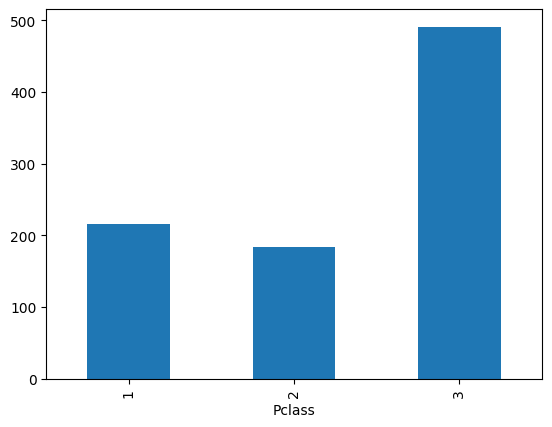

In [163]:
import matplotlib.pyplot as plt

titanic_pdf['Pclass'].value_counts().sort_index().plot.bar()

<Axes: xlabel='Survived'>

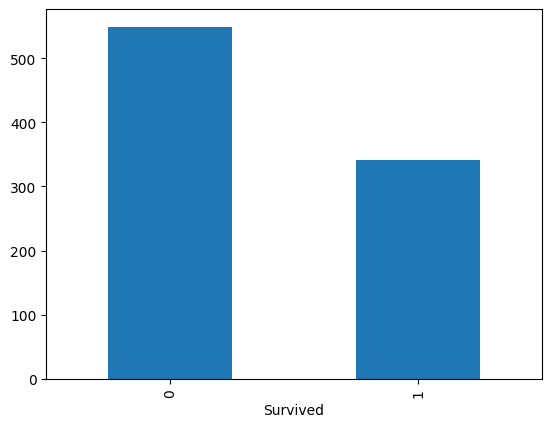

In [164]:
titanic_pdf['Survived'].value_counts().sort_index().plot.bar()

<Axes: xlabel='Survived'>

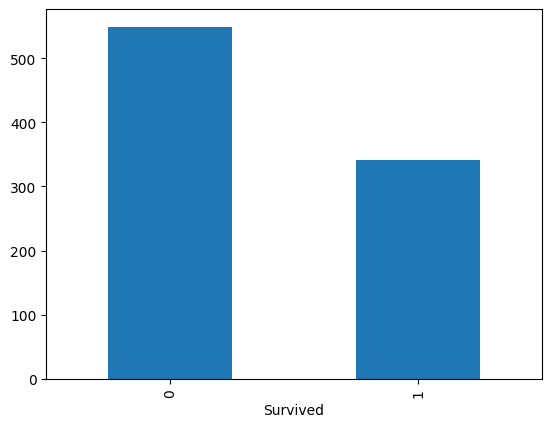

In [103]:
titanic_pdf.groupby('Survived')['Survived'].count().plot.bar()

In [105]:
titanic_pdf.groupby(['Survived', 'Sex'])[['Survived', 'Sex']].count()

Survived  Sex
Survived Sex                  
0        female        81   81
         male         468  468
1        female       233  233
         male         109  109

<Axes: xlabel='Survived,Sex'>

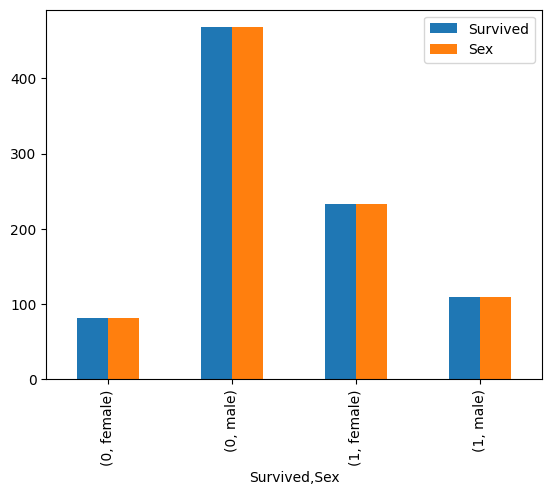

In [174]:
titanic_pdf.groupby(['Survived', 'Sex'])[['Survived', 'Sex']].count().plot(kind='bar')

In [106]:
titanic_pdf.groupby(['Survived', 'Sex', 'Pclass'])[['Survived', 'Sex', 'Pclass']].count()

Survived  Sex  Pclass
Survived Sex    Pclass                       
0        female 1              3    3       3
                2              6    6       6
                3             72   72      72
         male   1             77   77      77
                2             91   91      91
                3            300  300     300
1        female 1             91   91      91
                2             70   70      70
                3             72   72      72
         male   1             45   45      45
                2             17   17      17
                3             47   47      47

<Axes: xlabel='Survived,Sex,Pclass'>

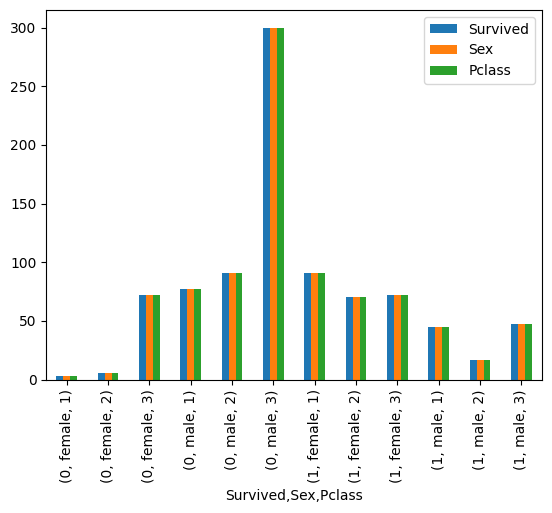

In [175]:
titanic_pdf.groupby(['Survived', 'Sex', 'Pclass'])[['Survived', 'Sex', 'Pclass']].count().plot(kind='bar')

<Axes: xlabel='Age', ylabel='Fare'>

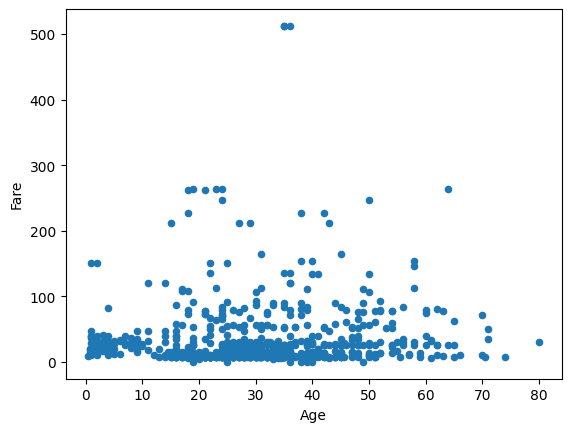

In [176]:
titanic_pdf[['Fare', 'Age']].plot.scatter(x='Age', y='Fare')

<Axes: >

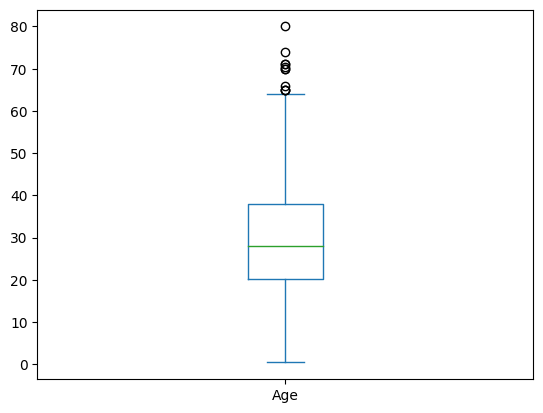

In [177]:
titanic_pdf['Age'].plot(kind='box')